# Traffic Sign Recognition

Lets get a overview of steps performing in traffic sign recognition.
- Data preprocessing using `PIL` (Python Image Library).
- Building a `CNN` Convolutional Neural Network Model.
- Training the model on [GTRSB](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) traffic signs dataset and validation.
- Testing the model with test dataset and deployment.
-----

Lets import all the required modules,
  - Choose `image_vector_size` as you needed which indicates the resize pixels of image.
  - `classes` represents number of classes to be classified in `GTRSB` dataset.

In [17]:
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

image_vector_size = 30
classes = 43

### 1. Data Preprocessing

Lets use the PIL library to read the images according to data folder structure and convert them into arrays as feature vectors.

In [18]:
class Preprocess():
	def __init__(self, path):
		self.training_path = path

	def get_training_data(self):
		images = []
		labels = []
		dir = os.listdir(self.training_path)
		for img_dir in dir:
			label = str(img_dir)
			if not label.startswith("."):
				cur_dir = os.listdir(self.training_path + '/' + img_dir)
				for img_name in cur_dir:
					if not img_name.startswith("."):
						try:
							img = Image.open(self.training_path + '/' + img_dir + '/' + img_name)
							img = np.array(img.resize((image_vector_size, image_vector_size)))
							images.append(img)
							labels.append(label)
						except:
							print("Error Loading image")
		return (np.array(images),np.array(labels))

In [19]:
training_path = "Data/Train"

t0 = time()
print("Started Reading Images ......")
preprocessor = Preprocess(training_path)
images_train, labels_train = preprocessor.get_training_data()
print("Done in % 0.3fs" % (time() - t0))

Started Reading Images ......
Done in  11.759s


Since we got our images and their labels lets split the data into train test and validate our model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.2, random_state=42)

Lets convert our labels to categorical variables based on number of classes using keras as it will better learn and categorize our `CNN` model.

In [21]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


### 2. Building model

To classify our images into respective `43` classes lets use `Convolutional Neural Networks` model which is best for image classification purpose. The architecture of our model as follows:

- Conv2D layer `(filter=32, kernel_size=(5,5), activation=”relu”)`
- MaxPool2D layer `( pool_size=(2,2))`
- Dropout layer `(rate=0.25)`
- 2 Conv2D layer `(filter=64, kernel_size=(3,3), activation=”relu”)`
- MaxPool2D layer `( pool_size=(2,2))`
- Dropout layer `(rate=0.25)`
- Flatten layer to squeeze the layers into 1 dimension
- Dense Fully connected layer `(256 nodes, activation=”relu”)`
- Dropout layer `(rate=0.5)`
- Dense layer `(43 nodes, activation=”softmax”)`

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

Lets compile the model with `Adam-optimizer` which performs well and since we have multiple classes to categorize using `categorical_crossentropy` as loss.

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### 3. Training the model

After building the model lets train using the training dataset we have, Since 64 `batch size` performs well among 32 and 64 lets use 64 as our batch size and since after 15 `epochs` the accuracy was stable and wasn't changing much lets stop our neural network training at that threshold.

In [24]:
epochs = 15

history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 24s 48ms/step - loss: 2.5478 - accuracy: 0.3865 - val_loss: 0.8986 - val_accuracy: 0.7712
Epoch 2/15
491/491 [==============================] - 25s 52ms/step - loss: 1.0446 - accuracy: 0.6864 - val_loss: 0.5826 - val_accuracy: 0.8440
Epoch 3/15
491/491 [==============================] - 26s 53ms/step - loss: 0.7484 - accuracy: 0.7737 - val_loss: 0.3087 - val_accuracy: 0.9186
Epoch 4/15
491/491 [==============================] - 26s 53ms/step - loss: 0.5944 - accuracy: 0.8181 - val_loss: 0.2371 - val_accuracy: 0.9249
Epoch 5/15
491/491 [==============================] - 26s 53ms/step - loss: 0.5029 - accuracy: 0.8482 - val_loss: 0.1885 - val_accuracy: 0.9450
Epoch 6/15
491/491 [==============================] - 28s 57ms/step - loss: 0.4429 - accuracy: 0.8664 - val_loss: 0.1773 - val_accuracy: 0.9434
Epoch 7/15
491/491 [==============================] - 27s 56ms/step - loss: 0.3920 - accuracy: 0.8800 - val_loss: 0.1365 - val_accuracy:

Lets plot the graph for accuracy and loss, like to visualize how they are varying with epochs.

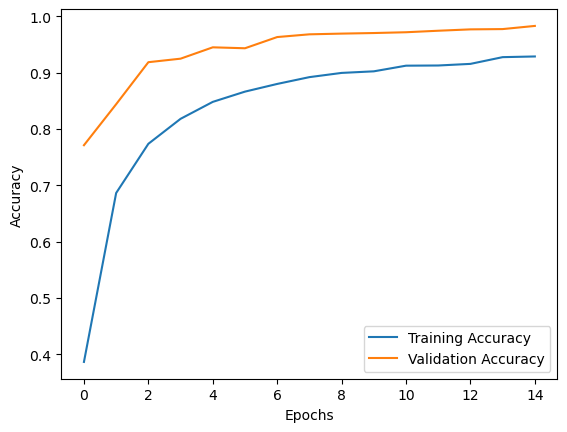

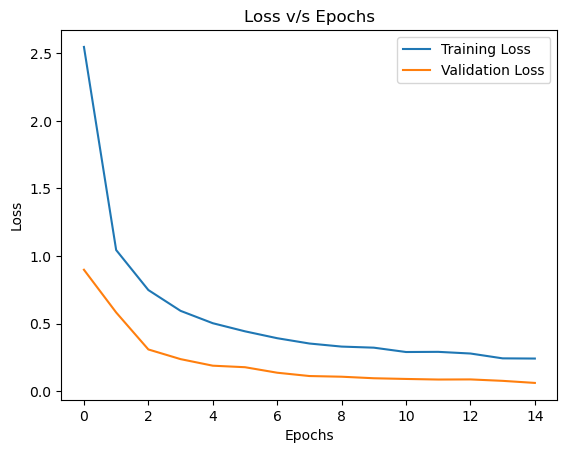

In [25]:
plt.figure(0)

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure(1)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss v/s Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### 4. Testing and deployment

As we got our model trained, lets get the testing data in vector format similarly as we performed in the beginning for training images using `PIL`. Labels of these test data are present in `Test.csv` file of `GTRSB` dataset.

In [26]:
def get_test_data(path):
	y_test = pd.read_csv(path + "/Test.csv")
	labels = y_test["ClassId"].values
	imgs = y_test["Path"].values
	data = []
	for img in imgs:
		try:
			image = Image.open(path + '/' + img)
			image = np.array(image.resize((image_vector_size, image_vector_size)))
			data.append(image)
		except:
			print("Error Loading image")
	return (np.array(data),labels)

In [27]:
path = "Data"

X_test, y_test = get_test_data(path)
predict_x = model.predict(X_test) 
y_pred= np.argmax(predict_x,axis=1)

395/395 [==============================] - 3s 7ms/step


As we got our predicted results lets test our models accuracy score.

In [28]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Accuracy score of our CNN model is: {score}")

Accuracy score of our CNN model is: 0.944338875692795


### Deployment

In [29]:
model.save("model.h5")